# importing the required

In [1]:
import tensorflow as tf
import keras
from keras.utils import np_utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import keras

# loading and splitting the data

In [3]:
#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

AttributeError: module 'keras' has no attribute 'datasets'

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

In [7]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

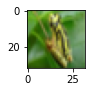

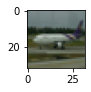

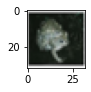

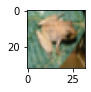

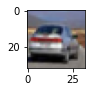

In [8]:
for i in range(232, 237):
    plt.subplot(120+i)
    img = x_train[i]
    plt.imshow(img)
    plt.show()

# preprocessing the data

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [10]:
x_train /= 255
x_test /= 255

In [11]:
pd.Series(y_train.flatten()).unique()    # there are 10 classes of images

array([6, 9, 4, 1, 2, 7, 8, 3, 5, 0], dtype=uint8)

In [12]:
n_classes = 10

In [13]:
# One hot encoding
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [14]:
y_train.shape

(50000, 10)

In [15]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
y_test.shape

(10000, 10)

# Building the model

In [17]:
from keras.models import Sequential

In [18]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [19]:
model = Sequential()

#### Convolutional layer

In [20]:
model.add(Conv2D(filters=50, kernel_size=(3, 3), input_shape=(32, 32, 3), strides=(1, 1), padding='same', activation='relu'))

In [21]:
model.add(Conv2D(75, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))

In [22]:
model.add(MaxPool2D(pool_size=(2, 2)))

In [23]:
model.add(Dropout(0.25))

In [24]:
model.add(Conv2D(125, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))

In [25]:
model.add(MaxPool2D(pool_size=(2, 2)))

In [26]:
model.add(Dropout(0.25))

In [27]:
model.add(Flatten())

### hidden layer

In [28]:
model.add(Dense(500, activation='relu'))

In [29]:
model.add(Dropout(0.4))

In [30]:
model.add(Dense(units=250, activation='relu'))

In [31]:
model.add(Dropout(0.3))

### output layer

In [32]:
model.add(Dense(10, 'softmax'))

### compiling

In [33]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### training the model

In [34]:
model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
391/391 [==============================] - 212s 513ms/step - loss: 1.8778 - accuracy: 0.3025 - val_loss: 1.2127 - val_accuracy: 0.5591
Epoch 2/5
391/391 [==============================] - 190s 487ms/step - loss: 1.2160 - accuracy: 0.5625 - val_loss: 0.9579 - val_accuracy: 0.6620
Epoch 3/5
391/391 [==============================] - 188s 482ms/step - loss: 0.9750 - accuracy: 0.6562 - val_loss: 0.8338 - val_accuracy: 0.7103
Epoch 4/5
391/391 [==============================] - 188s 482ms/step - loss: 0.8644 - accuracy: 0.6968 - val_loss: 0.7673 - val_accuracy: 0.7366
Epoch 5/5
391/391 [==============================] - 194s 496ms/step - loss: 0.7557 - accuracy: 0.7377 - val_loss: 0.7305 - val_accuracy: 0.7464


### predicting

In [35]:
classes = range(0, 10)

In [36]:
names = ['airplane',
         'automobile',
         'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship'
         'truck']

In [37]:
# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))
class_labels

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'shiptruck'}

In [38]:
# generate batch of 9 images to predict
batch = x_test[100:109]
labels = np.argmax(y_test[100:109], axis=-1)  # axis=1
labels

array([4, 5, 6, 3, 1, 1, 3, 6, 8], dtype=int64)

In [39]:
y_test[100:109]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [40]:
np.argmax(y_test[100:109], axis=1)

array([4, 5, 6, 3, 1, 1, 3, 6, 8], dtype=int64)

In [41]:
# make predictions
predictions = model.predict(batch, verbose=1)
predictions

1/1 [==============================] - 1s 526ms/step


array([[9.3674479e-04, 2.0110854e-05, 3.0973148e-02, 1.8797660e-02,
        7.6779050e-01, 4.7427662e-02, 2.6566891e-03, 1.3105085e-01,
        2.0964367e-04, 1.3701044e-04],
       [3.1832019e-03, 1.4841352e-03, 4.2894121e-02, 1.7445880e-01,
        1.6856550e-01, 3.0425134e-01, 5.2556563e-02, 2.4117422e-01,
        3.4613982e-03, 7.9707354e-03],
       [1.4767882e-04, 3.8113774e-04, 5.5591483e-03, 2.9482631e-02,
        2.2039351e-03, 6.2938971e-03, 9.5452064e-01, 1.9008578e-04,
        5.3201750e-04, 6.8884110e-04],
       [9.3240982e-05, 3.3530247e-05, 4.8921080e-03, 8.5080552e-01,
        3.4624271e-02, 3.9028253e-02, 6.8680473e-02, 1.2272748e-03,
        3.0691494e-04, 3.0846754e-04],
       [1.0198703e-04, 9.7901022e-01, 5.2678621e-07, 3.5127000e-06,
        1.2041799e-08, 2.8385887e-07, 4.2346386e-07, 3.3524606e-07,
        9.6945395e-04, 1.9913342e-02],
       [3.3348813e-04, 9.8882663e-01, 7.8153980e-06, 1.1787985e-05,
        1.1343185e-07, 1.2784130e-06, 4.5521210e-06, 3.87

In [42]:
for image in predictions:
    print(np.sum(image))

1.0
1.0
1.0
1.0
1.0000001
0.99999994
1.0
0.9999999
1.0


In [43]:
class_result = np.argmax(predictions, axis=-1)
class_result

array([4, 5, 6, 3, 1, 1, 8, 6, 8], dtype=int64)

# Final Object detection

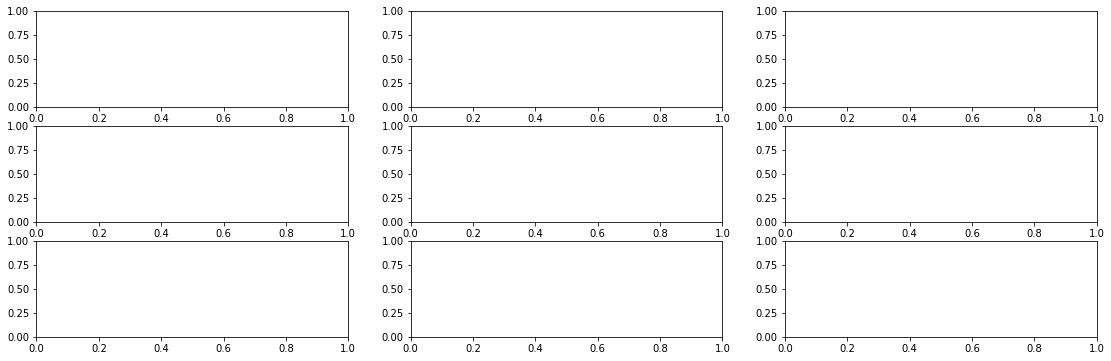

In [44]:
fig, axs = plt.subplots(3, 3, figsize=(19, 6))

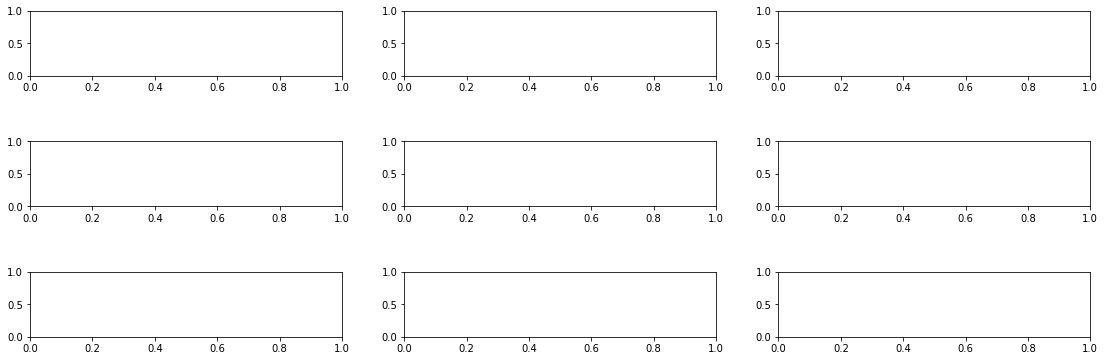

In [45]:
fig, axs = plt.subplots(3, 3, figsize=(19, 6))
fig.subplots_adjust(hspace=1)

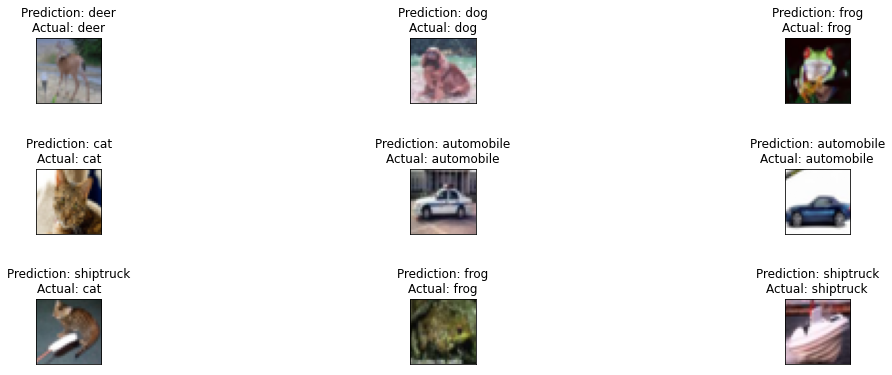

In [46]:
fig, axs = plt.subplots(3, 3, figsize=(19, 6))
fig.subplots_adjust(hspace=1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
    # plot the image
    axs[i].imshow(img)

In [47]:
type(class_result)

numpy.ndarray

actual =  deer
predict =  deer


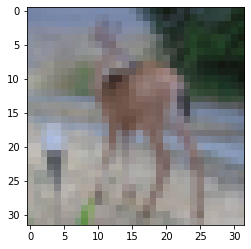

actual =  dog
predict =  dog


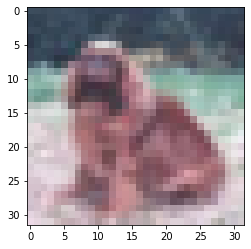

actual =  frog
predict =  frog


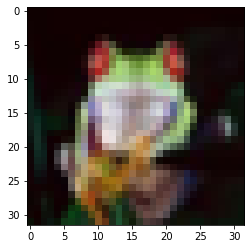

actual =  cat
predict =  cat


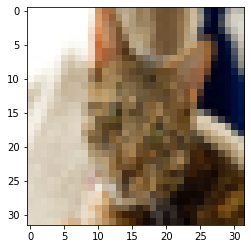

actual =  automobile
predict =  automobile


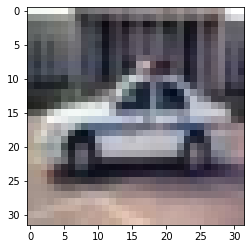

actual =  automobile
predict =  automobile


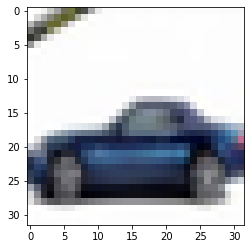

actual =  cat
predict =  shiptruck


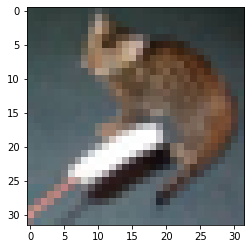

actual =  frog
predict =  frog


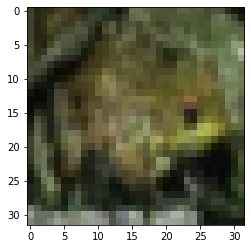

actual =  shiptruck
predict =  shiptruck


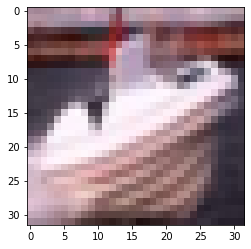

In [59]:
i = 0
for img in batch:
    print('actual =',class_labels[labels[i]])
    print('predict =',class_labels[class_result[i]])
    plt.imshow(img)
    plt.show()
    i+=1